In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [62]:
elec_use = pd.read_csv("../../data/UNdata_Export_house_elec_use.csv", skipfooter=3, engine='python')
gdp_and_internet_use = pd.read_csv("../../data/gdp_and_internet_use.csv", engine='python')
gdp_df = pd.read_csv("../../data/UNdata_Export_GDP.csv", skipfooter=3, engine='python')

gdp_df = gdp_df.drop(columns='Value Footnotes')
gdp_df.columns=['Country', 'Year', 'GDP_Per_Capita']


elec_use = elec_use.drop(columns=(["Commodity - Transaction", "Unit", "Quantity Footnotes"]))
elec_use.columns=['Country', 'Year', 'Elec Quantity(KWh/mil)']

replace_country_labels = ({"Brunei Darussalam": "Brunei", 
                           "Central African Rep.":"Central African Republic", 
                           "Congo (Democratic Republic of the)":"Dem. Rep. Congo", 
                           "Dominican Rep.":"Dominican Republic", 
                           "Hong Kong, China":"Hong Kong SAR, China", 
                           "Iran (Islamic Rep. of)":"Iran", 
                           "Korea (Rep. of)":"Korea", 
                           "Kyrgyzstan":"Kyrgyz Republic", 
                           "Lao P.D.R.":"Lao PDR", 
                           "Macao, China":"Macao SAR, China", 
                           "Micronesia (Fed. States of)":"Micronesia", 
                           "Viet Nam":"Vietnam"})
elec_use = elec_use.replace({"Country": replace_country_labels})

elec_use


,Country,Year,Elec Quantity(KWh/mil)
0,Afghanistan,2019,3020.0
1,Afghanistan,2018,2952.0
2,Afghanistan,2017,2811.8
3,Afghanistan,2016,2729.9
4,Afghanistan,2015,2220.2
...,...,...,...
6305,Zimbabwe,1994,1608.0
6306,Zimbabwe,1993,1566.0
6307,Zimbabwe,1992,1572.0
6308,Zimbabwe,1991,1549.0


In [63]:
gdp_internet_elec = pd.merge(gdp_and_internet_use, elec_use, on=["Country", "Year"])
gdp_elec = pd.merge(gdp_df, elec_use, on=["Country", "Year"])

#gdp_internet_elec = gdp_and_internet_use.drop(columns="Unnamed: 0")
gdp_internet_elec

,Unnamed: 0,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct,Elec Quantity(KWh/mil)
0,0,Afghanistan,2014,2102.385234,Asia,6.390000,2204.9
1,1,Afghanistan,2013,2116.465454,Asia,5.900000,1933.7
2,2,Afghanistan,2012,2075.491747,Asia,5.454545,1922.0
3,3,Afghanistan,2011,1904.559799,Asia,5.000000,1620.0
4,4,Afghanistan,2010,1957.029338,Asia,4.000000,1387.0
...,...,...,...,...,...,...,...
3337,3705,Zimbabwe,1997,3580.048793,Africa,0.033080,1991.0
3338,3706,Zimbabwe,1996,3520.430146,Africa,0.016790,1831.0
3339,3707,Zimbabwe,1995,3226.413930,Africa,0.007684,1672.0
3340,3708,Zimbabwe,1994,3263.934978,Africa,0.001739,1608.0


<AxesSubplot:xlabel='Year'>

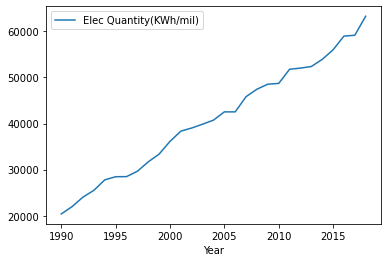

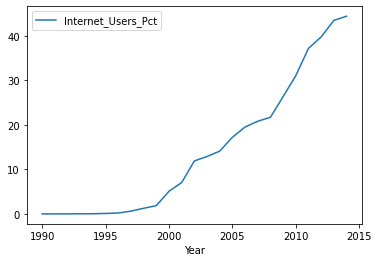

In [74]:
elec_use[elec_use["Country"].isin(["Mexico"])].pivot_table(values="Elec Quantity(KWh/mil)",index=["Year"]).plot()
gdp_and_internet_use[gdp_and_internet_use["Country"].isin(["Mexico"])].pivot_table(values="Internet_Users_Pct",index=["Year"]).plot()
